In [198]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Violin plots, entry-level errorbar plots, and the GOP's 16-way primary in 2015.

# Seaborn violin plots

In [199]:
salaries = pd.read_csv("../data/Current_Employee_Names__Salaries__and_Position_Titles_20210819_Chicago.csv")


In [200]:
salaries

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,118998.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,97440.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,NaN,121272.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,119712.0,NaN
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,45.9
...,...,...,...,...,...,...,...,...
31054,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,76266.0,NaN
31055,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,80016.0,NaN
31056,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
31057,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


In [201]:
salaried = salaries.query("`Salary or Hourly`=='Salary'")

In [202]:
salaried.sample(n=5)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
12390,"HUMPHREY, MILLIE J",ASST CORPORATION COUNSEL I,LAW,F,Salary,NaN,71304.0,NaN
27217,"TAHRILOVA, STELLA D",CIVIL ENGINEER III,WATER MGMNT,F,Salary,NaN,109620.0,NaN
4713,"CLARK, JASON T",LIEUTENANT,POLICE,F,Salary,NaN,142380.0,NaN
26873,"STRONG, NIKOL",POLICE COMMUNICATIONS OPERATOR I,OEMC,F,Salary,NaN,66852.0,NaN
26949,"SU, JESUS F",SANITARIAN II,HEALTH,F,Salary,NaN,96096.0,NaN


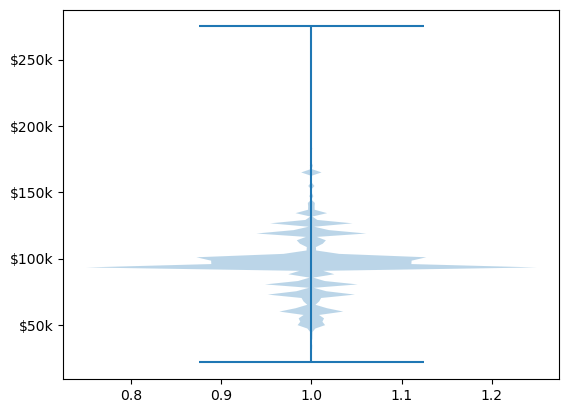

In [209]:
fig,ax=plt.subplots()
from matplotlib import ticker
plt.violinplot(salaried["Annual Salary"], bw_method=0.01)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("$%0d"))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: "${:,d}k".format(int(x/1000))))

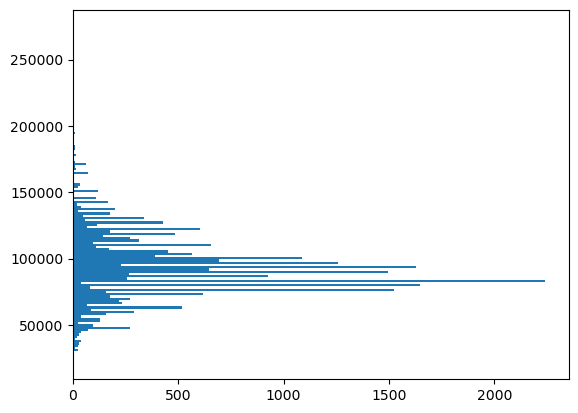

In [207]:
plt.hist(salaried["Annual Salary"], orientation="horizontal", bins=150);

In [210]:
from collections import defaultdict

In [211]:
def other():
    return "Other"

In [212]:
d = defaultdict(other)
d["POLICE"] = "POLICE"
d["FIRE"] = "FIRE"

In [ ]:
d["FOO"]

In [213]:
salaried["simple"] = salaried["Department"].apply(lambda x: d[x])
salaried.simple.value_counts()

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_84844/2398012236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaried["simple"] = salaried["Department"].apply(lambda x: d[x])


simple
POLICE    12807
Other      6840
FIRE       4785
Name: count, dtype: int64

In [214]:
gb = salaried.groupby("simple")["Annual Salary"]
gb

Text(0.5, 0, 'Department')

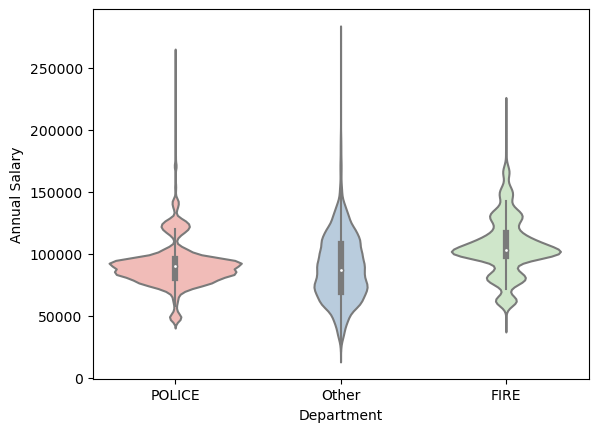

In [215]:
import seaborn as sns
sns.violinplot(x="simple", y="Annual Salary", data=salaried, palette="Pastel1")
plt.xlabel ("Department")

In [216]:
salaried.simple.value_counts()

simple
POLICE    12807
Other      6840
FIRE       4785
Name: count, dtype: int64

In [217]:
def other():
    return "Other\nn=6840"
d = defaultdict(other)
d["POLICE"] = "POLICE\nn=12807"
d["FIRE"] = "FIRE\nn=4785"
salaried["simple"] = salaried["Department"].apply(lambda x: d[x])
salaried.simple.value_counts()

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_84844/387680250.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaried["simple"] = salaried["Department"].apply(lambda x: d[x])


simple
POLICE\nn=12807    12807
Other\nn=6840       6840
FIRE\nn=4785        4785
Name: count, dtype: int64

Text(0.5, 1.0, '2021 Chicago Municipal worker salaries')

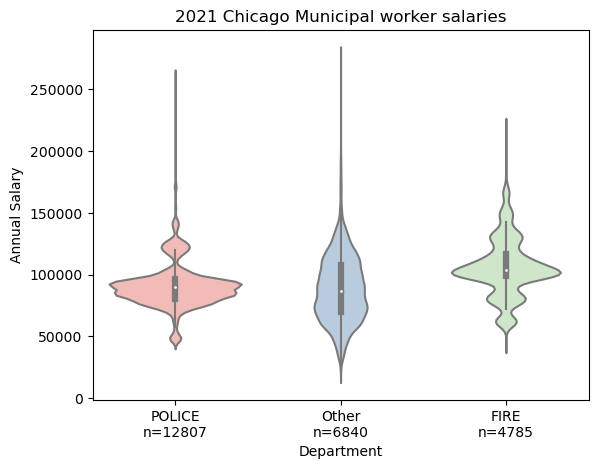

In [218]:
sns.violinplot(x="simple", y="Annual Salary", data=salaried, palette="Pastel1")
plt.xlabel ("Department")
plt.title("2021 Chicago Municipal worker salaries")

<AxesSubplot: xlabel='simple', ylabel='Annual Salary'>

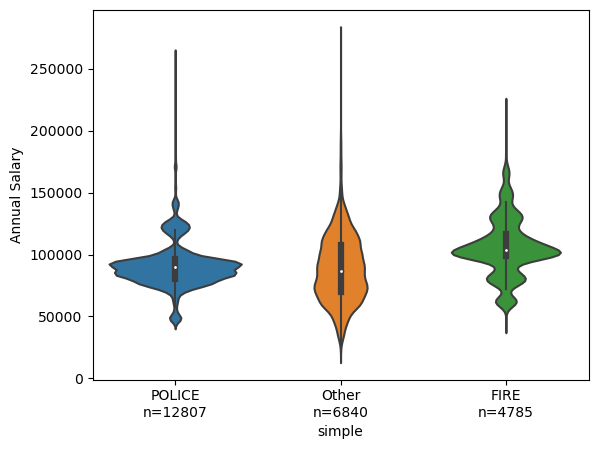

In [222]:
sns.violinplot(x="simple", y="Annual Salary", data=salaried, bw_method=0.005)
# That's a gorgeous tutorial: 
#  https://seaborn.pydata.org/generated/seaborn.violinplot.html


# No-frills error bars

In [223]:
means = np.random.random(50) * 30 +15
bars = np.ones(shape=50)*10  # ALL ERROR BARS ARE \PM 10 

<ErrorbarContainer object of 3 artists>

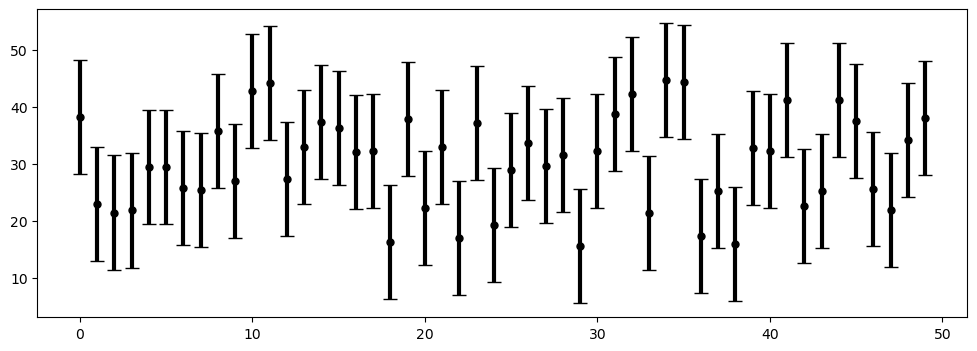

In [224]:

# plot black dots at means, error bars plus and minus bars 
plt.figure(figsize=(12,4))
plt.errorbar(range(len(means)), means, bars, fmt=".k", capsize=5, ecolor="black", linewidth=3, markersize=10)


Text(0.5, 1.0, '100 Random Normal deviates')

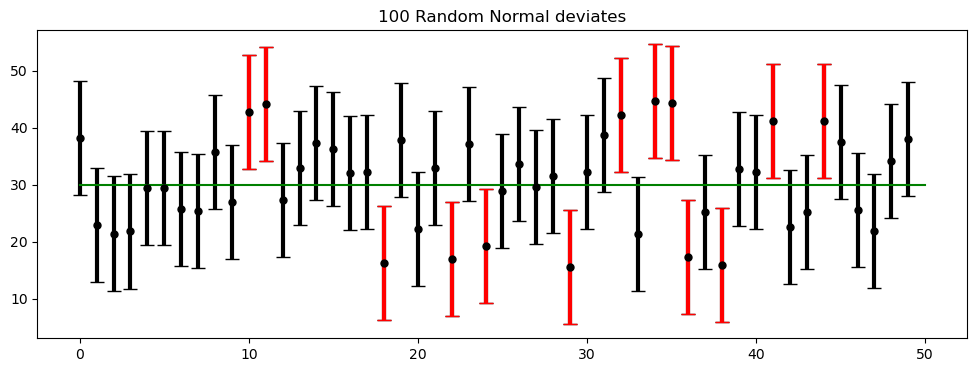

In [225]:
# plot all the dots black
plt.figure(figsize=(12,4))
plt.errorbar(range(len(means)), means, bars, fmt=".k", capsize=5, ecolor="black", linewidth=3, markersize=10)

# Since bars is always 10,  test for means that are more than 10 away from 30: 
outsideindexes = np.where( ( means >40 ) | (means < 20 ) )[0]  
# identify subsets of means, bars to paint red: 
outsidemeans = means[outsideindexes]
outsidebars = bars[outsideindexes]
# plot some of the dots red:
plt.errorbar(outsideindexes, outsidemeans, outsidebars, fmt=".k", capsize=5, ecolor="red", linewidth=3)
plt.plot([0, 50], [30,30], color="green")
plt.title("100 Random Normal deviates")

<ErrorbarContainer object of 3 artists>

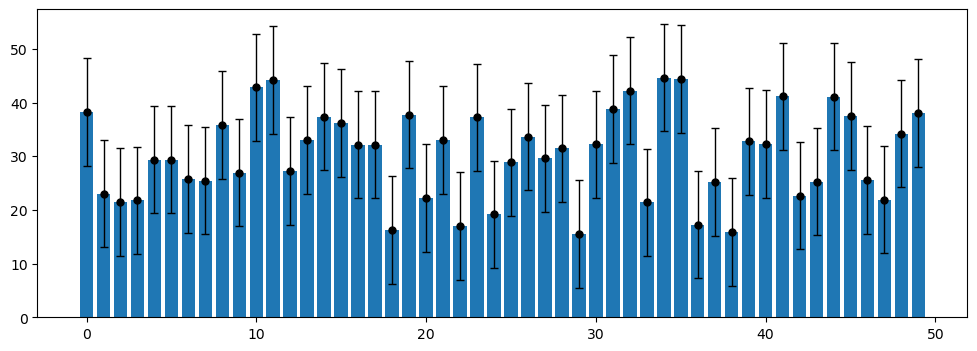

In [227]:
plt.figure(figsize=(12,4))
plt.bar(range(len(means)), means)
plt.errorbar(range(len(means)), means, bars, fmt=".k", capsize=3, ecolor="black", linewidth=1, markersize=10)


# The GOP has an overcrowded debate problem.

In [ ]:
# http://www.npr.org/sections/itsallpolitics/2015/05/29/410524780/the-gop-has-an-overcrowded-debate-problem
# Quinippiac U. polled 679 likely Republican primary voters and gave each 16 candidates to choose from.
# The report rounds the responses to the nearest percent, so we've taken the liberty to replace "0" with "0.0025" 

df = { "Candidate": [ "Bush", "Carson", "Huckabee" , "Rubio", "Walker", "Paul", "Cruz", "Trump", "Christie", "Fiorina", 
                     "Kasich", "Graham", "Jindal", "Perry", "Pataki", "Santorum" ] , 
      "Support": [ .1, .1, .1,.1, .1, .07, .06, 0.05, .04, .02, .02, .01, .01, .01, .0025, .0025]}

poll = pd.DataFrame (df)

In [ ]:
poll["Survey"] = poll.Support * 679

In [ ]:
plt.barh(poll.Candidate, poll.Support)

In [ ]:
poll["baderrorbars"] = 0* poll.Support + .038
poll.baderrorbars

In [ ]:
plt.barh(poll.Candidate, poll.Support)
plt.plot(poll.Support, np.arange(len(poll)),  'o',linestyle="", c="red" )

plt.errorbar(poll.Support, np.arange(len(poll)), xerr=  poll.baderrorbars, linestyle="" ,c="black" )


In [ ]:
x = np.arange(0, 1, .001)
(679 * .1, 679 * .9), (679 * .03, 679 * .97), (679 * .01, 679 * .99)

In [ ]:
y10 = scipy.stats.beta.pdf( x, a = 679 * .1+1, b = 679 * .9+1) 
y03 = scipy.stats.beta.pdf( x, a = 679 * .03+1, b = 679 * .97+1) 
y01 = scipy.stats.beta.pdf( x, a = 679 * .01+1, b = 679 * .99+1) 

plt.plot(x, y10, label=" Beta(69, 612), p=.1" )
plt.plot(x, y03, label=" Beta(21, 660), p=.03" )
plt.plot(x, y01, label=" Beta(8, 673), p=.01" )
plt.ylabel("Posterior probability density")
plt.xlabel("Sample proportion")
plt.legend()
plt.xlim(0, 0.2)


In [ ]:

plt.plot(x, y10.cumsum()/len(y10), label=" Beta(69, 612), p=.1" )
plt.plot(x, y03.cumsum()/len(y03), label=" Beta(21, 660), p=.03" )
plt.plot(x, y01.cumsum()/len(y01), label=" Beta(8, 673), p=.01" )
plt.legend()
plt.ylabel("Cumulative probability")
plt.xlabel("Sample proportion")
plt.xlim(0, 0.2)

In [ ]:
poll.baderrorbars

In [ ]:
import scipy.stats
lower = scipy.stats.beta.ppf ( .005, a = poll.Survey+1, b = 679 - poll.Survey+1)
upper = scipy.stats.beta.ppf ( .995, a = poll.Survey+1, b = 679 - poll.Survey+1)

In [ ]:
plt.scatter(poll.Support, poll.Candidate, )
plt.scatter(lower, poll.Candidate, )
plt.scatter(upper, poll.Candidate, )


In [ ]:
plt.scatter(poll.Support, poll.Candidate )
plt.errorbar(poll.Support, poll.Candidate,xerr=(poll.Support-lower, upper-poll.Support), linestyle="" )
plt.errorbar(poll.Support, np.arange(len(poll))-0.2,xerr=poll.baderrorbars, linestyle="" )
plt.xlim(0,0.14)

In [ ]:
lower.shape

In [ ]:
plt.scatter(poll.Support, poll.Candidate )
plt.errorbar(poll.Support, poll.Candidate,xerr=(poll.Support-lower, upper-poll.Support), linestyle="" )
plt.errorbar(poll.Support, np.arange(len(poll))-0.2,xerr=poll.baderrorbars, linestyle="" )
plt.errorbar(poll.Support,  np.arange(len(poll)), yerr=0.5*np.ones((2,16)), linestyle="" )

plt.xlim(0,0.14)